Import dependencies

In [4]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [5]:
# https://huggingface.co/datasets/Nooha/cc_fraud_detection_dataset
original_ds = load_dataset("Nooha/cc_fraud_detection_dataset")

In [6]:
# convert to df
df_train=original_ds['train'].to_pandas()

## Inspecting dataset

In [7]:
df_train.head()

,ssn,cc_num,first,last,gender,city,state,zip,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant
0,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,c036244703adb9d5392f4027d9d4b38d,2021-07-31,02:30:01,1627678801,grocery_pos,337.54,1,fraud_Kovacek
1,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,42f000b0b3b0ef534e5b8ef9ec1db13a,2021-08-01,22:37:41,1627837661,personal_care,21.13,1,fraud_Bradtke
2,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,543037b1baf088961e58d00b705f4bcc,2021-08-01,23:02:09,1627839129,personal_care,22.61,1,fraud_Kozey-Kuhlman
3,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,00a4e08643edebf9277c2967676f6a26,2021-08-01,22:27:24,1627837044,health_fitness,17.32,1,fraud_Hills
4,367-85-9826,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,492c4412815306718f686fc5b459a285,2021-12-02,02:28:51,1638392331,misc_pos,75.82,0,fraud_Kemmer-Buckridge


## Remove useless columns

In [8]:
df_train.drop(columns=['trans_num','first','last'])

,ssn,cc_num,gender,city,state,zip,city_pop,job,dob,acct_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant
0,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-07-31,02:30:01,1627678801,grocery_pos,337.54,1,fraud_Kovacek
1,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-08-01,22:37:41,1627837661,personal_care,21.13,1,fraud_Bradtke
2,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-08-01,23:02:09,1627839129,personal_care,22.61,1,fraud_Kozey-Kuhlman
3,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-08-01,22:27:24,1627837044,health_fitness,17.32,1,fraud_Hills
4,367-85-9826,4361337605230458,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,2021-12-02,02:28:51,1638392331,misc_pos,75.82,0,fraud_Kemmer-Buckridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646689,751-28-9829,4888818930461631,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,2023-06-02,22:05:19,1685723719,kids_pets,5.10,0,fraud_Cartwright PLC
2646690,751-28-9829,4888818930461631,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,2023-07-27,12:19:49,1690440589,kids_pets,7.05,0,fraud_Waelchi Inc
2646691,751-28-9829,4888818930461631,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,2023-10-13,20:40:24,1697209824,personal_care,2.31,0,fraud_Emmerich-Rau
2646692,751-28-9829,4888818930461631,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,2023-05-19,19:03:38,1684503218,home,8.35,0,fraud_Renner Ltd


## Check for duplication and null values

In [ ]:
# no missing values
print(df_train.isnull().sum())

# no duplicated rows
print(any(df_train.duplicated()))

ssn           0
cc_num        0
first         0
last          0
gender        0
city          0
state         0
zip           0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
trans_date    0
trans_time    0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
dtype: int64
False


## Fix data types

In [46]:
# check datatypes
df_train.dtypes

ssn            object
cc_num          int64
first          object
last           object
gender         object
city           object
state          object
zip             int64
city_pop        int64
job            object
dob            object
acct_num        int64
trans_num      object
trans_date     object
trans_time     object
unix_time       int64
category       object
amt           float64
is_fraud        int64
merchant       object
dtype: object

In [14]:
# Convert trans_date, dob, trans_time to datetime
df_train[['trans_date','dob']] = df_train[['trans_date','dob']].apply(pd.to_datetime)
# extract the hours
df_train['trans_time'] = pd.to_datetime(df_train['trans_time'], format="%H:%M:%S").dt.time

# remove "-" in `ssn`
df_train['ssn']=df_train['ssn'].str.replace('-','')
# convert `ssn` to integer
df_train['ssn']=df_train['ssn'].astype(int)

print(df_train[['ssn','trans_date','dob']])

               ssn trans_date        dob
0        367859826 2021-07-31 1987-06-12
1        367859826 2021-08-01 1987-06-12
2        367859826 2021-08-01 1987-06-12
3        367859826 2021-08-01 1987-06-12
4        367859826 2021-12-02 1987-06-12
...            ...        ...        ...
2646689  751289829 2023-06-02 1969-09-14
2646690  751289829 2023-07-27 1969-09-14
2646691  751289829 2023-10-13 1969-09-14
2646692  751289829 2023-05-19 1969-09-14
2646693  751289829 2023-07-21 1969-09-14

[2646694 rows x 3 columns]


## Shorten `merchant` values
All mechants contain the prefix 'fraud_' in their name. The prefix is removed to reduce redundant information.

In [48]:
# check if all inputs contain 'fraud_'
print(df_train['merchant'].str.contains('fraud_').count()==df_train['merchant'].count()) # True
df_train['merchant']=df_train['merchant'].str.replace('fraud_','',regex=False)

df_train['merchant']

True


0                   Kovacek
1                   Bradtke
2             Kozey-Kuhlman
3                     Hills
4          Kemmer-Buckridge
                 ...       
2646689      Cartwright PLC
2646690         Waelchi Inc
2646691        Emmerich-Rau
2646692          Renner Ltd
2646693                Metz
Name: merchant, Length: 2646694, dtype: object

# Simple Feature Engineering
## Creating new variables

In [17]:
# split `trans_date into year, month and date for better analysis`
df_train['year'] = df_train['trans_date'].dt.year
df_train["month"] = df_train['trans_date'].dt.strftime('%Y-%m')
df_train['day'] = df_train['trans_date'].dt.day
df_train['day_of_week'] = df_train['trans_date'].dt.dayofweek

df_train["trans_quarter"] = pd.PeriodIndex(df_train['month'], freq='Q')

# get number of counts for each year
df_train['year'].value_counts() # output looks evenly split

year
2023    884851
2022    882285
2021    879558
Name: count, dtype: int64

In [50]:
# Generate `age` from `dob`
today= datetime.today()
df_train['age']=df_train['dob'].apply(lambda x: today.year-x.year -((today.month,today.day)<(x.month,x.day)))
print(df_train['age'].head())

0    37
1    37
2    37
3    37
4    37
Name: age, dtype: int64


In [18]:
# generate unique states each city appears in
city_count=df_train.groupby('city')['state'].apply(set).reset_index()
# show cities which exist in multiple states
print(city_count[city_count['state'].apply(lambda x: len(x)>1)])

# Create `city_state`, since multiple states may have the same city names
df_train['city_state'] = df_train['city'] + ", " + df_train['state']
df_train['city_state']

               city         state
6            Albany      {KY, NY}
20          Arcadia      {FL, CA}
21        Arlington      {VA, TX}
28           Aurora  {CO, IL, NC}
29           Austin      {MN, TX}
45          Bedford      {NH, MA}
49         Bellevue  {WA, NE, MI}
52           Belton      {MO, TX}
77         Brighton      {MI, MO}
93           Camden      {NJ, NY}
131        Columbia      {SC, TN}
132        Columbus  {OH, NE, MT}
133         Concord      {CA, NC}
156          Dallas  {GA, PA, TX}
160      Darlington      {SC, MD}
173           Dover      {DE, PA}
192          Elmira      {MI, NY}
243        Glendale      {CA, AZ}
264        Hamilton      {OH, MT}
297         Houston      {MN, TX}
302      Huntsville      {AL, TX}
312         Jackson      {TN, MI}
344       Lancaster      {KY, CA}
355       Lexington      {KY, IL}
362      Livingston      {NJ, MT}
367      Long Beach      {CA, NY}
369      Louisville      {KY, AL}
375         Madison      {NJ, WI}
385          M

0                 Chandler, OK
1                 Chandler, OK
2                 Chandler, OK
3                 Chandler, OK
4                 Chandler, OK
                  ...         
2646689    Pleasant Garden, NC
2646690    Pleasant Garden, NC
2646691    Pleasant Garden, NC
2646692    Pleasant Garden, NC
2646693    Pleasant Garden, NC
Name: city_state, Length: 2646694, dtype: object

# EDA
In this section, we will be looking at the balance of the dataset and the features's distributions and patterns

## Overall Proportion of Fraudulent Cases

In [21]:
num_frauds = len(df_train[df_train["is_fraud"] == 1].index)
num_rows = len(df_train.index)

print(f"Number of frauduent cases: {num_frauds}, propotion: {round(num_frauds/num_rows, 4) * 100}%")
print(f"Number of non-frauduent cases: {num_rows-num_frauds}, propotion: {round((num_rows-num_frauds)/num_rows, 4) * 100}%")

Number of frauduent cases: 9422, propotion: 0.36%
Number of non-frauduent cases: 2637272, propotion: 99.64%


## Time Series Analysis

### Fraud Counts (Overall)

      month  is_fraud
0   2021-01       254
1   2021-02       299
2   2021-03       239
3   2021-04       372
4   2021-05       345
5   2021-06       212
6   2021-07       283
7   2021-08       247
8   2021-09       283
9   2021-10       225
10  2021-11       284
11  2021-12       295
12  2022-01       278
13  2022-02       249
14  2022-03       293
15  2022-04       191
16  2022-05       328
17  2022-06       218
18  2022-07       224
19  2022-08       278
20  2022-09       237
21  2022-10       195
22  2022-11       329
23  2022-12       256
24  2023-01       129
25  2023-02       227
26  2023-03       292
27  2023-04       234
28  2023-05       212
29  2023-06       263
30  2023-07       305
31  2023-08       220
32  2023-09       173
33  2023-10       382
34  2023-11       237
35  2023-12       334


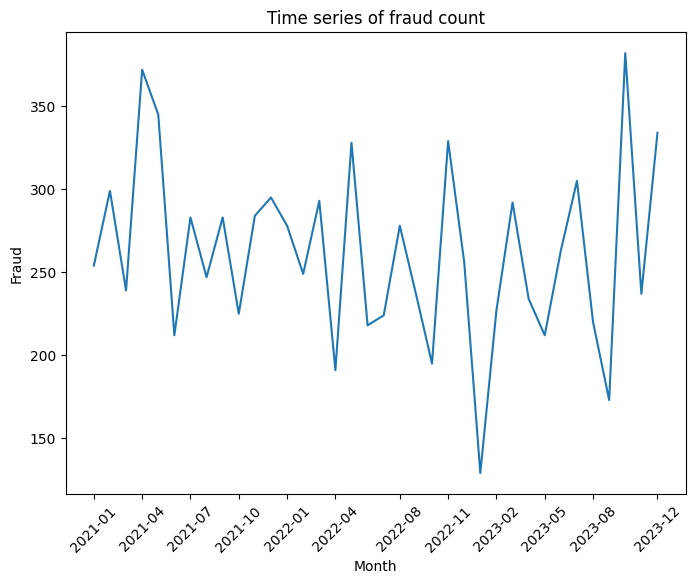

In [22]:
time_num_frauds = df_train[["month", "is_fraud"]].groupby(by = "month", as_index = False).sum()
print(time_num_frauds)

plt.figure(figsize=(8, 6))
plt.plot('month','is_fraud', data=time_num_frauds) 
plt.title('Time series of fraud count')
plt.xlabel('Month')
plt.ylabel('Fraud')
plt.xticks(time_num_frauds['month'][np.linspace(0, len(time_num_frauds) - 1, num=len(time_num_frauds[::3]), dtype=int)], rotation=45)
plt.show()

### Fraud Counts (By quarter)

               is_fraud
trans_quarter          
2021Q1              792
2021Q2              929
2021Q3              813
2021Q4              804
2022Q1              820
2022Q2              737
2022Q3              739
2022Q4              780
2023Q1              648
2023Q2              709
2023Q3              698
2023Q4              953


<Figure size 800x600 with 0 Axes>

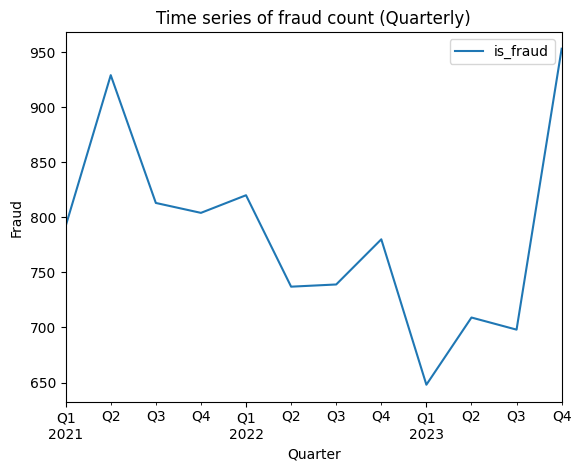

In [23]:
time_num_frauds = df_train[["trans_quarter", "is_fraud"]].groupby(by = "trans_quarter").sum()
print(time_num_frauds)

plt.figure(figsize=(8, 6))
time_num_frauds.plot()
# plt.plot(time_num_frauds['trans_quarter'].astype(str), time_num_frauds['is_fraud'])
plt.title('Time series of fraud count (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Fraud')
plt.show()

### Proportion of Frauds (Quarterly)

trans_quarter
2021Q1    0.004855
2021Q2    0.004269
2021Q3    0.003505
2021Q4    0.003013
2022Q1    0.005071
2022Q2    0.003388
2022Q3    0.003176
2022Q4    0.002885
2023Q1    0.004010
2023Q2    0.003261
2023Q3    0.002982
2023Q4    0.003506
Freq: Q-DEC, dtype: float64


/var/folders/fl/982cw_1x42jd0883_dqg16_80000gn/T/ipykernel_45528/3683823264.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_num_frauds = df_train[["trans_quarter", "is_fraud"]].groupby(by = "trans_quarter").apply(lambda x: x["is_fraud"].sum()/len(x))


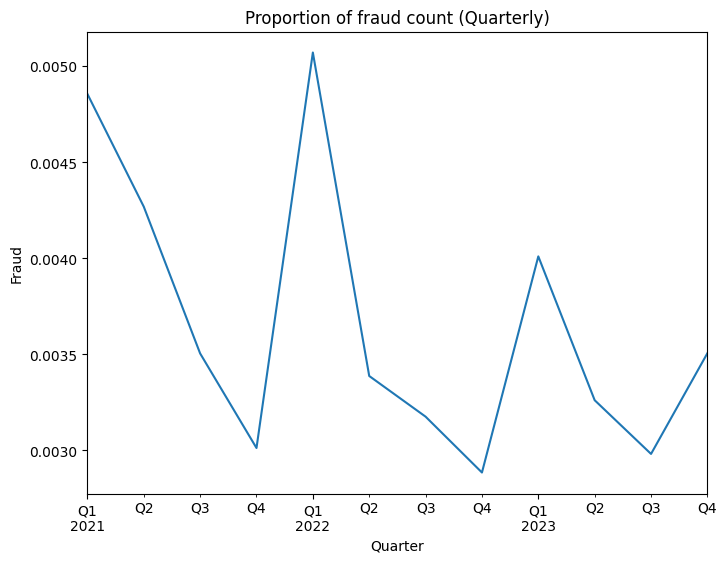

In [ ]:
time_num_frauds = df_train[["trans_quarter", "is_fraud"]].groupby(by = "trans_quarter").apply(lambda x: x["is_fraud"].sum()/len(x))
print(time_num_frauds)

plt.figure(figsize=(8, 6))
time_num_frauds.plot()
plt.title('Proportion of fraud count (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Fraud')
plt.show()

## Check if one SSN has multiple credit card numbers
1) and 2) gives me conflicting outcomes... so do I remove or not remove 'cc_num'

In [27]:
# see if any ssn is linked to multiple credit cards
creditcard_count = df_train.groupby('ssn')['cc_num'].apply(set).reset_index()
print(creditcard_count[creditcard_count['cc_num'].apply(lambda x: len(x)>1)]) # result: 1 ssn linked to only 1 cc_num

Empty DataFrame
Columns: [ssn, cc_num]
Index: []


## Higher population leads to higher number of fraud cases

From the data, it shows that cities with a larger population leads to greater number of frauds from the best fit line.

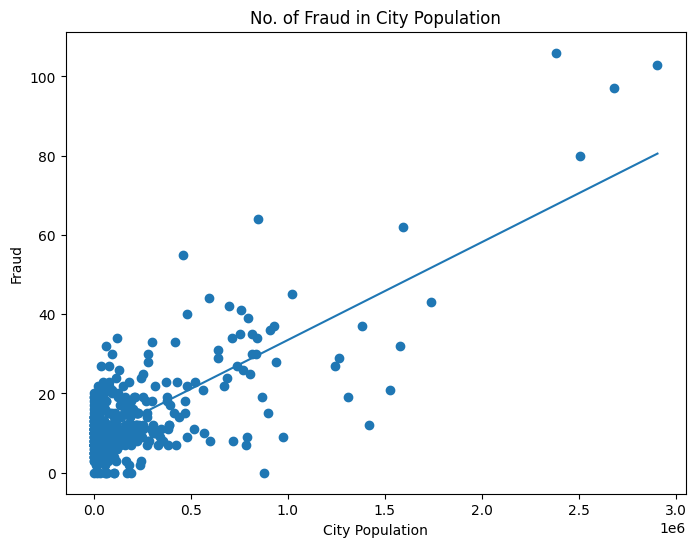

In [32]:
# check if higher population leads to higher fraud cases (since it may be easier to commit fraud) 
# fraud count per city_pop
fraud_count = df_train.groupby('city_pop')['is_fraud'].sum().reset_index()

a, b = np.polyfit(fraud_count["city_pop"], fraud_count["is_fraud"], 1)

plt.figure(figsize=(8, 6))
plt.scatter('city_pop','is_fraud', data=fraud_count)
plt.plot(fraud_count["city_pop"], a * fraud_count["city_pop"] + b)
plt.title('No. of Fraud in City Population')
plt.xlabel('City Population')
plt.ylabel('Fraud')
plt.show()

## Some cities may be more popular for committing fraud
filter to a random state

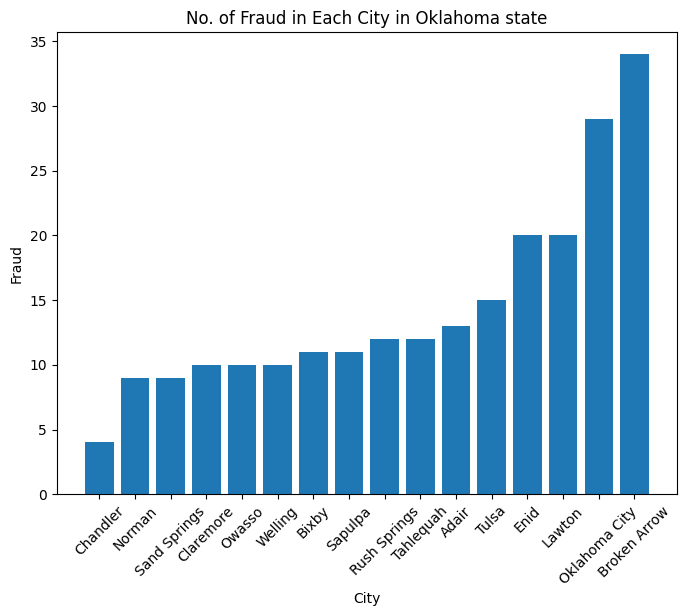

In [33]:
# x: city_state, y: fraud_count
# fraud count per city_pop, filter to a state to check
df_ok = df_train[df_train['state']=="OK"]
fraud_count = df_ok.groupby('city')['is_fraud'].sum().reset_index()
sorted_fraud=fraud_count.sort_values(by='is_fraud')

plt.figure(figsize=(8, 6))
plt.bar('city','is_fraud', data=sorted_fraud) 
plt.title('No. of Fraud in Each City in Oklahoma state')
plt.xlabel('City')
plt.ylabel('Fraud')
plt.xticks(rotation=45)
plt.show()

## Fraud involves larger sums
Transaction between $500 to $1000 shows the highest proportion of fraudulent transaction and as such it could be used to create a new feature using transaction amount bins

In [41]:
labels = ['0-100', '100-500', '500-1000', '1000-5000', '>5000']
bins = [0, 100, 500, 1000, 5000, float('inf')]

# Create a new column with the range
fraud_count['amt_range'] = pd.cut(fraud_count['amt'], bins=bins, labels=labels, right=False) # note to myself: look into this concept
fraud_count.groupby('amt_range')['is_fraud'].mean()

# seems like amt= 500-1000 has the highest count of fraud

/var/folders/fl/982cw_1x42jd0883_dqg16_80000gn/T/ipykernel_45528/1834837429.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_count.groupby('amt_range')['is_fraud'].mean()


amt_range
0-100        0.000756
100-500      0.025498
500-1000     0.170505
1000-5000    0.141789
>5000        0.000000
Name: is_fraud, dtype: float64

## Some occupations are prone to greater risk of fraudulent transactions than others
Occupations that have a tendency to have strong earning power shows greater proportion of transactions being fraudulent, showing a tendency for fraudsters to target individuals with wealth

                         job  is_fraud  total_count  fraud_percentage
0         Academic librarian        10         1104          0.905797
1      Accommodation manager        11         4381          0.251084
2                 Accountant       109        23052          0.472844
3      Accounting technician        40        10957          0.365063
4                      Actor        46        13156          0.349650
..                       ...       ...          ...               ...
415           Water engineer        18         4381          0.410865
416  Water quality scientist        11         2197          0.500683
417       Wellsite geologist         8         6556          0.122026
418                   Writer        16         4382          0.365130
419             Youth worker        53        20811          0.254673

[420 rows x 4 columns]


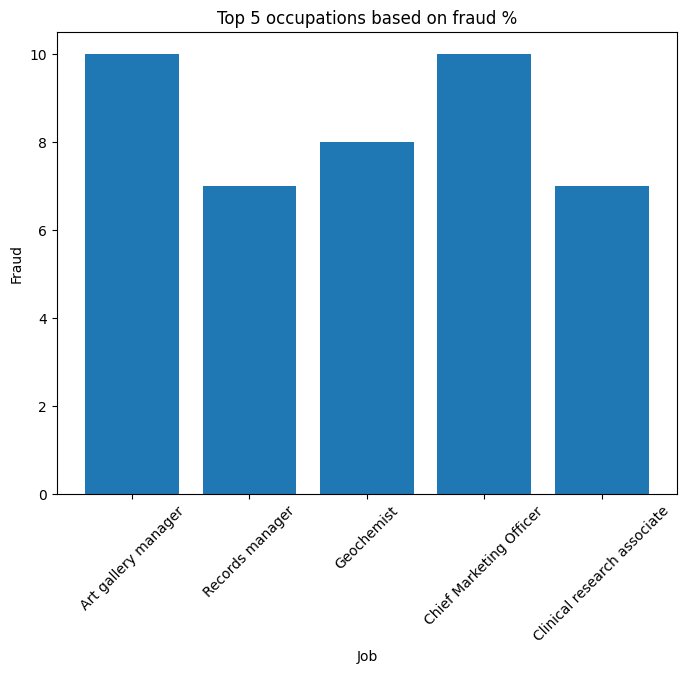

In [ ]:
# x: city_state, y: fraud_count
# fraud count per city_pop, filter to a state to check
fraud_count = df_train.groupby('job')['is_fraud'].sum().reset_index()

# Calculate total transactions by job
total_count = df_train.groupby('job')['is_fraud'].count().reset_index()
total_count.rename(columns={'is_fraud': 'total_count'},inplace=True)


# Merge fraud count and total count
fraud_percentage = pd.merge(fraud_count, total_count, on='job')


# Calculate percentage of fraud
fraud_percentage['fraud_percentage'] = (fraud_percentage['is_fraud'] / fraud_percentage['total_count']) * 100
top_5=fraud_percentage.sort_values(by='fraud_percentage',ascending=False).head(5)
print(fraud_percentage)
# show occupations with the highest % of frauds

plt.figure(figsize=(8, 6))
plt.bar('job','is_fraud', data=top_5) 
plt.title('Top 5 occupations based on fraud %')
plt.xlabel('Job')
plt.ylabel('Fraud')
plt.xticks(rotation=45)
plt.show()